In [1]:
import os
import pandas as pd

# Define the directory where your CSV files are located
data_dir = '../bayesian_approch_for_wave_signal_processing/data/EEG_data'

# Columns based on your data description
columns = ['COUNTER', 'INTERPOLATED', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

# List to store data from all files
data_list = []

# Iterate over all CSV files in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith('.csv'):
        # Full path to the file
        file_path = os.path.join(data_dir, file_name)
        
        # Read the CSV file, skipping the first row (metadata) and setting header=None to manually assign column names
        data = pd.read_csv(file_path, skiprows=1, names=columns)
        
        # Add a new column 'Source' with the name of the file (category)
        data['Source'] =  os.path.splitext(file_name)[0]
        
        # Append the data to the list
        data_list.append(data)

# Concatenate all data into a single DataFrame
eeg_data = pd.concat(data_list, ignore_index=True)

# Display basic info about the data
print(eeg_data.head())
print(eeg_data.info())


   COUNTER  INTERPOLATED          AF3           F7           F3          FC5  \
0     17.0           0.0  4183.589641  4191.794769  4178.461436  4168.205026   
1     18.0           0.0  4183.589641  4200.512718  4179.999898  4193.333231   
2     19.0           0.0  4198.461436  4207.692205  4188.717846  4206.153743   
3     20.0           0.0  4198.974256  4191.794769  4184.615282  4184.102462   
4     21.0           0.0  4187.179385  4184.102462  4176.922975  4169.230667   

            T7           P7           O1           O2           P8  \
0  4257.948614  4202.051179  4231.794768  4202.051179  4237.948614   
1  4241.538358  4182.564000  4225.128102  4199.487077  4235.384512   
2  4229.743486  4196.410154  4229.743486  4210.256307  4247.179383   
3  4231.281948  4203.589641  4232.820409  4209.230666  4241.025537   
4  4204.102461  4196.922974  4230.769127  4204.615282  4235.384512   

            T8          FC6           F4           F8          AF4     Source  
0  4204.102461  41

#### Dataset Information
Additional Information

The tests are explained in more detail in the articles attached to the databases. The tests are visual experiments, so the signal you may be more interested in are the electrodes O1 and O2 (Columns I and J) according to the extensive literature review and international standards. Each subject performed different tests which are provided in .csv format as follows: suppose you have a .csv which name is A001SB1_1 This means the data corresponds to group A (only Group A is provided at present), subject 001, Test SB1 (Five Box Visual Test), and first experiment (_1, there could be a repetition of the experiment which will be _2, _3, etc). The different tests are as follows: SB1 - Five Box Visual Test 1, SB2 - Five Box Visual Test 2, SB3 - Five Box Visual Test 3 (There are three different Five Box tests, these are not repetitions of the same test), SV1 - Visual Image Search, SM1 - Motor Images (Hand Shake Experiment). Since these experiments are visual tests, you may be interested in the electrodes O1 and O2. A file named Signal Database.xlsx is provided with a list of every experiment carried out and the subjects for each experiment. The real name of each subject are not provided due to confidentiality issues.

In [2]:
eeg_data[['Group', 'Subject', 'Test', 'Experiment']] = eeg_data['Source'].str.extract(r'([A-Z])(\d{3})(S[BMV]\d)_(\d)')
eeg_data.head()

,COUNTER,INTERPOLATED,AF3,F7,F3,FC5,T7,P7,O1,O2,...,T8,FC6,F4,F8,AF4,Source,Group,Subject,Test,Experiment
0,17.0,0.0,4183.589641,4191.794769,4178.461436,4168.205026,4257.948614,4202.051179,4231.794768,4202.051179,...,4204.102461,4168.717847,4186.666564,4181.025539,4180.512718,A001SB1_1,A,001,SB1,1
1,18.0,0.0,4183.589641,4200.512718,4179.999898,4193.333231,4241.538358,4182.564000,4225.128102,4199.487077,...,4194.871692,4172.307590,4193.846051,4185.640923,4184.615282,A001SB1_1,A,001,SB1,1
2,19.0,0.0,4198.461436,4207.692205,4188.717846,4206.153743,4229.743486,4196.410154,4229.743486,4210.256307,...,4208.717846,4191.281949,4203.076820,4195.897333,4196.922974,A001SB1_1,A,001,SB1,1
3,20.0,0.0,4198.974256,4191.794769,4184.615282,4184.102462,4231.281948,4203.589641,4232.820409,4209.230666,...,4207.179384,4189.230667,4201.538359,4193.846051,4197.948615,A001SB1_1,A,001,SB1,1
4,21.0,0.0,4187.179385,4184.102462,4176.922975,4169.230667,4204.102461,4196.922974,4230.769127,4204.615282,...,4182.051180,4181.538359,4201.025538,4190.769128,4189.743487,A001SB1_1,A,001,SB1,1


In [3]:
# Check for missing values in each column
missing_values = eeg_data.isna().sum()

# Calculate the percentage of missing data for each column
missing_percentage = (missing_values / len(eeg_data)) * 100

# Display the number of missing values for each column
print("Missing percentage in each column:\n", missing_percentage)

Missing percentage in each column:
 COUNTER         0.051762
INTERPOLATED    0.051762
AF3             0.051762
F7              0.051762
F3              0.051762
FC5             0.051762
T7              0.051762
P7              0.051762
O1              0.051762
O2              0.051762
P8              0.051762
T8              0.051762
FC6             0.051762
F4              0.051762
F8              0.051762
AF4             0.051762
Source          0.000000
Group           0.000000
Subject         0.000000
Test            0.000000
Experiment      0.000000
dtype: float64


In [4]:
eeg_data[eeg_data.isna()].head()

,COUNTER,INTERPOLATED,AF3,F7,F3,FC5,T7,P7,O1,O2,...,T8,FC6,F4,F8,AF4,Source,Group,Subject,Test,Experiment
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
eeg_data.dropna(inplace=True)

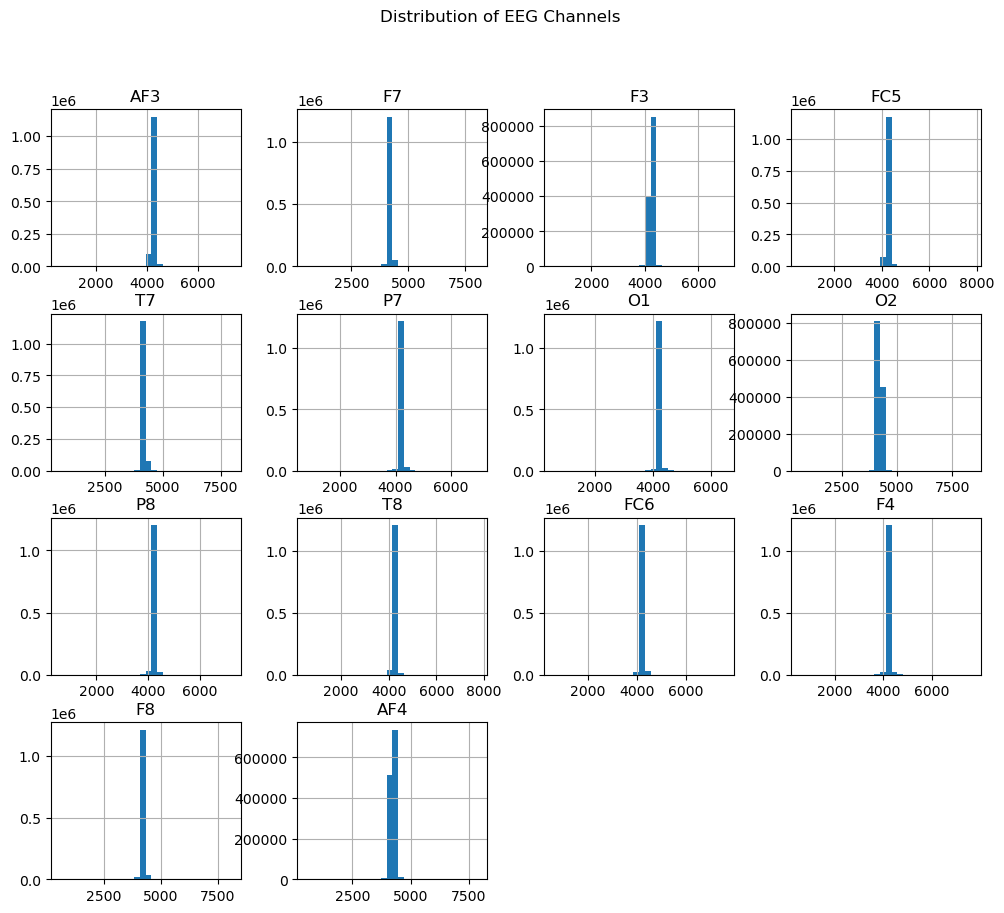

In [6]:
import matplotlib.pyplot as plt

# Plot histograms for EEG channels
eeg_data[['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']].hist(bins=30, figsize=(12, 10))
plt.suptitle('Distribution of EEG Channels')
plt.show()


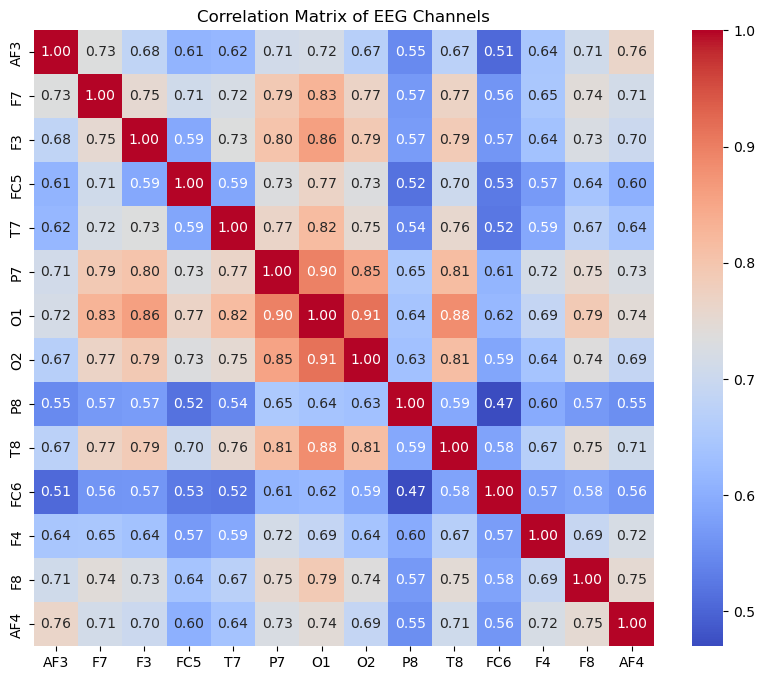

In [7]:
# Compute correlation matrix
corr_matrix = eeg_data[['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']].corr()

# Plot the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of EEG Channels')
plt.show()


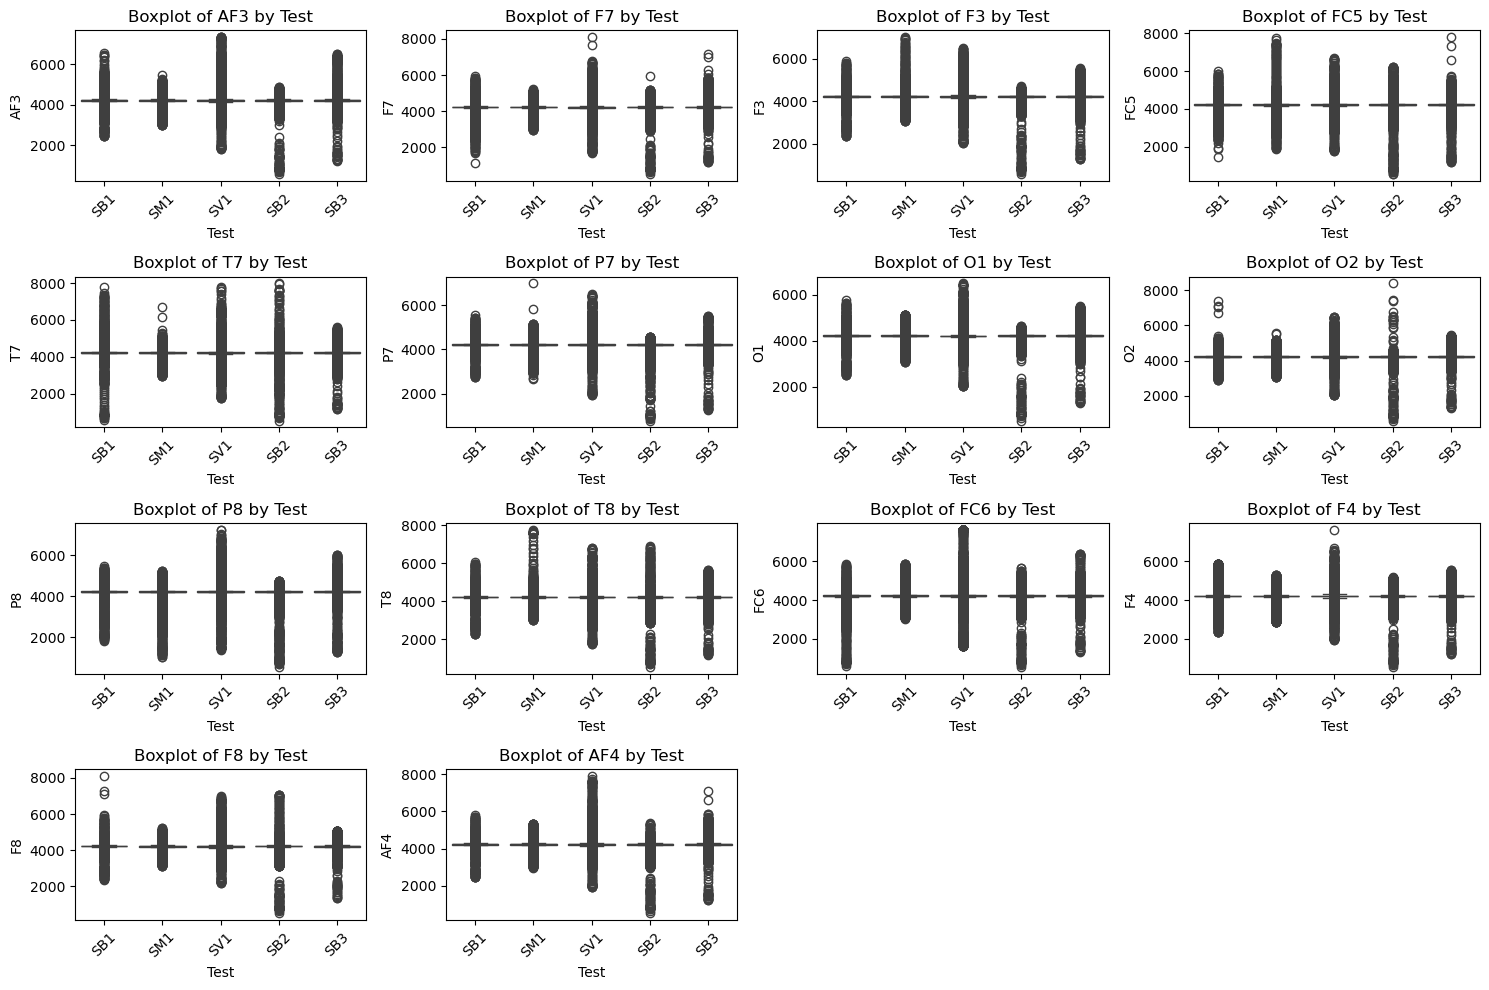

In [8]:
# Select EEG channels for plotting
eeg_channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

# Set up the plot dimensions
plt.figure(figsize=(15, 10))

# Loop through each channel to create a boxplot for each
for i, channel in enumerate(eeg_channels, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Test', y=channel, data=eeg_data)
    plt.title(f'Boxplot of {channel} by Test')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

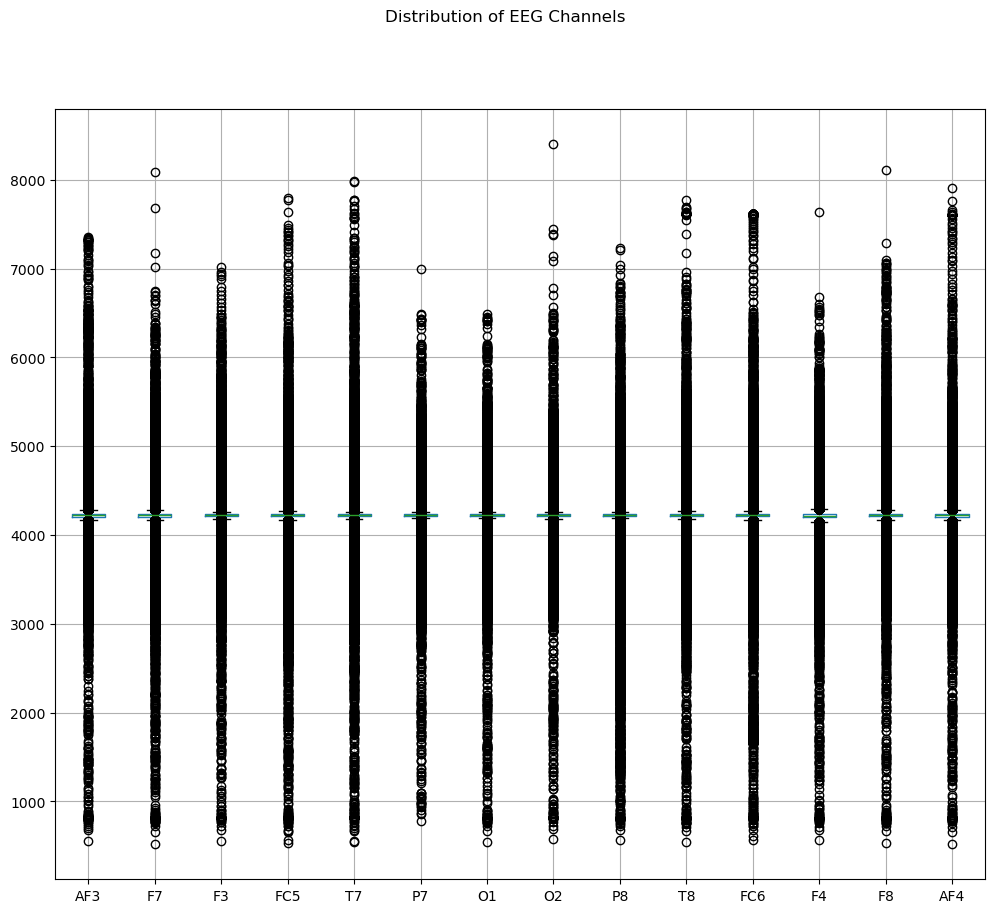

In [9]:
# Plot histograms for EEG channels
eeg_data[['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']].boxplot( figsize=(12, 10))
plt.suptitle('Distribution of EEG Channels')
plt.show()


<Figure size 1200x800 with 0 Axes>

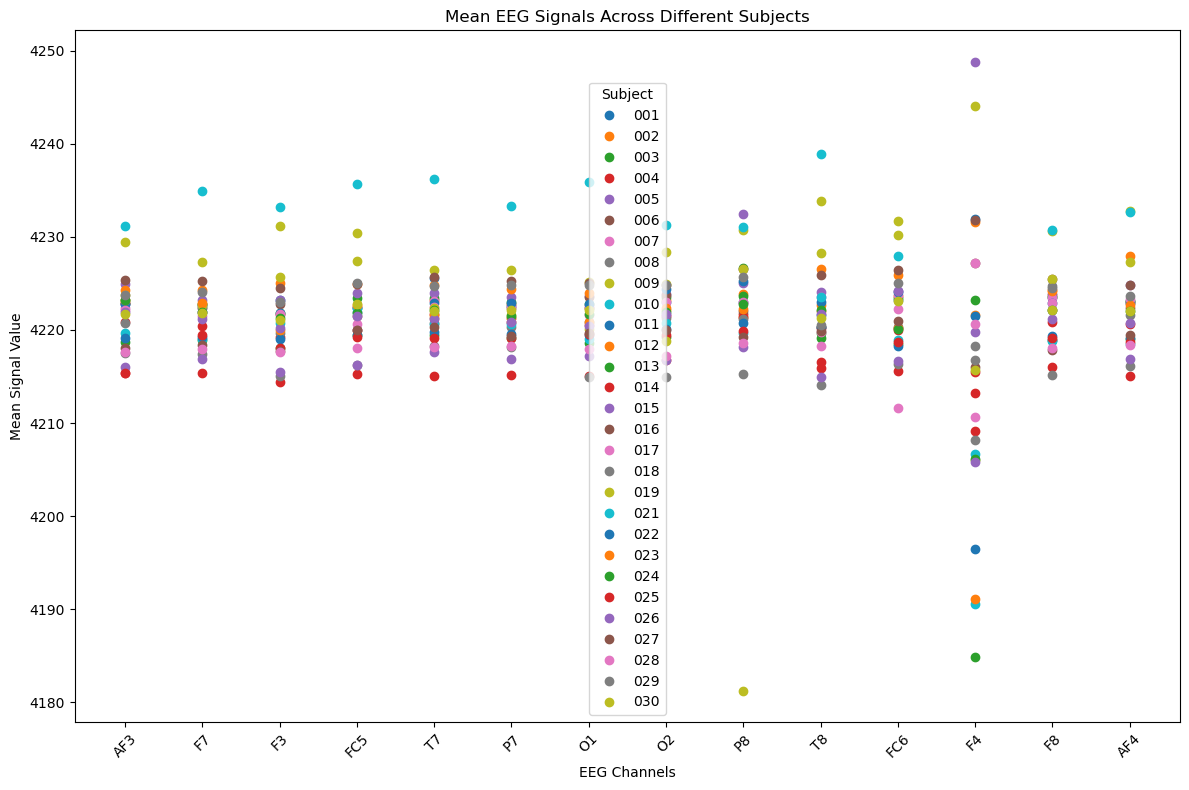

In [10]:
# Group the data by 'Subject' and calculate the mean for each EEG channel
subject_grouped = eeg_data.groupby('Subject')[['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']].mean()

# Transpose the data for better visualization (channels as x-axis, subjects as lines)
subject_grouped = subject_grouped.T

# Plot the comparison
plt.figure(figsize=(12, 8))
subject_grouped.plot(kind='line', marker='o',linestyle='',figsize=(12, 8))

# Set plot title and labels
plt.title('Mean EEG Signals Across Different Subjects')
plt.ylabel('Mean Signal Value')
plt.xlabel('EEG Channels')

# Ensure all channel names are displayed on the x-axis
plt.xticks(ticks=range(len(subject_grouped.index)), labels=subject_grouped.index, rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout for better viewing
plt.show()

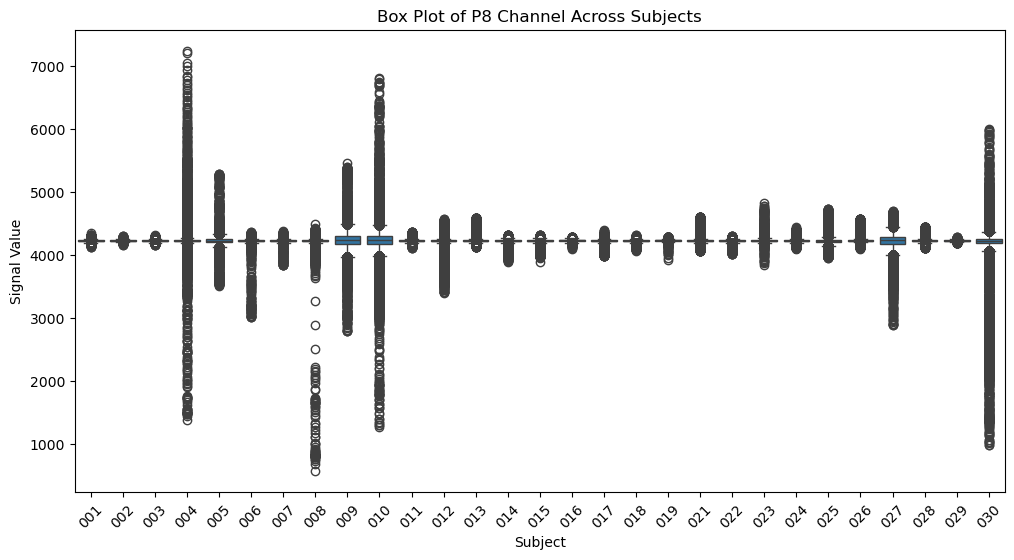

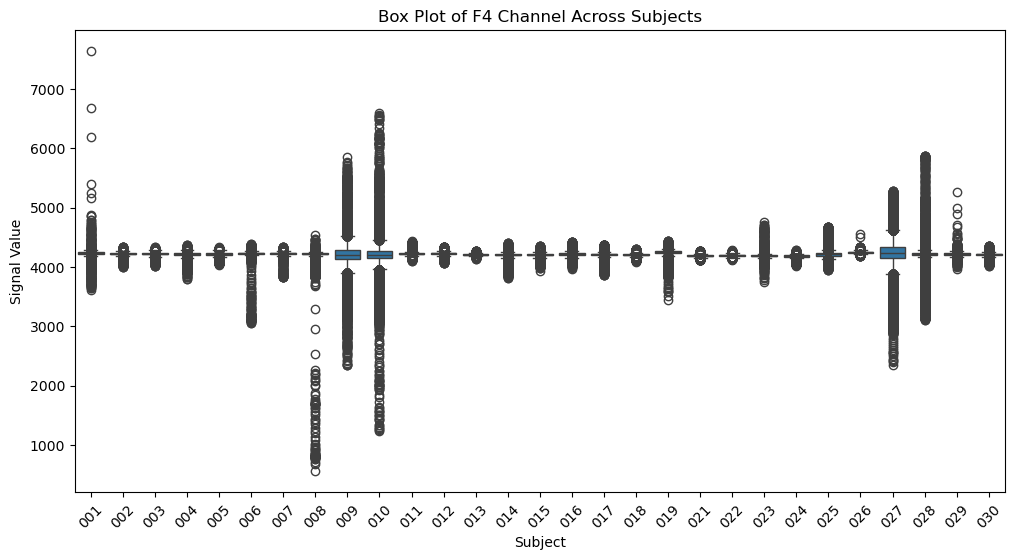

In [11]:
# Filter the data for only the 'P8' and 'F4' channels
filtered_data = eeg_data[['Subject', 'P8', 'F4']]

# Melt the data so that it's easier to plot (long format)
melted_data = pd.melt(filtered_data, id_vars='Subject', value_vars=['P8', 'F4'], var_name='Channel', value_name='Signal')

# Create individual box plots for each channel
channels = ['P8', 'F4']

for channel in channels:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Subject', y='Signal', data=melted_data[melted_data['Channel'] == channel])
    
    # Set plot title and labels
    plt.title(f'Box Plot of {channel} Channel Across Subjects')
    plt.xlabel('Subject')
    plt.ylabel('Signal Value')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

# Select EEG channels only for GMM (no metadata)
eeg_channels = eeg_data[['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']]

# Standardize the data
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_channels)


### Noise and Signal Separation Using GMM using O1 and O2

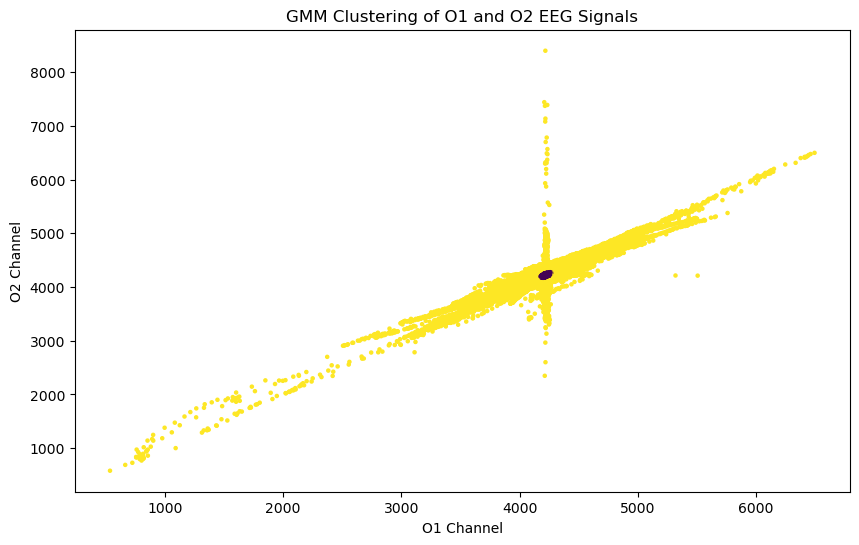

In [14]:
from sklearn.mixture import GaussianMixture
o1_o2_scaled = scaler.fit_transform(eeg_data[['O1', 'O2']])
# Fit GMM with 2 components (for noise and signal)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(o1_o2_scaled)

# Predict clusters (0 = noise, 1 = signal or vice versa)
labels = gmm.predict(o1_o2_scaled)

# Add the labels to the original DataFrame
eeg_data['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(eeg_data['O1'], eeg_data['O2'], c=eeg_data['Cluster'], cmap='viridis', s=5)
plt.title('GMM Clustering of O1 and O2 EEG Signals')
plt.xlabel('O1 Channel')
plt.ylabel('O2 Channel')
plt.show()

### Noise Removal
- Bandpass Filtering
   - Apply a bandpass filter to retain frequencies of interest.

In [15]:
from scipy.signal import butter, filtfilt

# Bandpass filter design (1-50 Hz)
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply the bandpass filter to the EEG data (O1 and O2)
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data)

In [16]:
# Example: Filter O1 and O2 channels
fs = 128  # Sampling frequency (as per your metadata)
lowcut = 1
highcut = 50

eeg_data['O1_filtered'] = bandpass_filter(eeg_data['O1'], lowcut, highcut, fs)
eeg_data['O2_filtered'] = bandpass_filter(eeg_data['O2'], lowcut, highcut, fs)

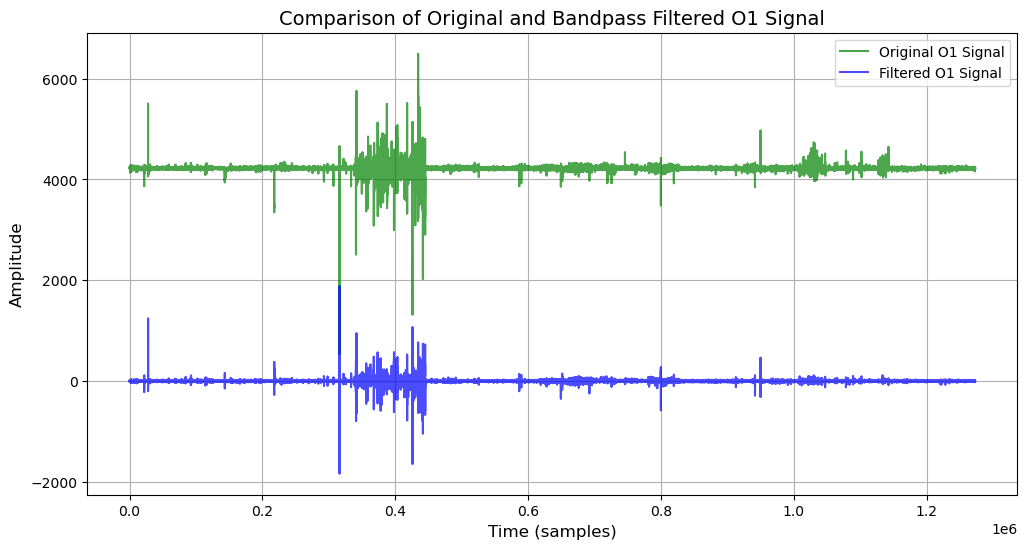

In [17]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot the original O1 signal
plt.plot(eeg_data['O1'], color='green', label='Original O1 Signal', alpha=0.7)

# Plot the filtered O1 signal
plt.plot(eeg_data['O1_filtered'], color='blue', label='Filtered O1 Signal', alpha=0.7)

# Add title and labels
plt.title('Comparison of Original and Bandpass Filtered O1 Signal', fontsize=14)
plt.xlabel('Time (samples)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)

# Add a legend to distinguish between the original and filtered signals
plt.legend(loc='upper right')

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()

### Epoch extraction

In [18]:
import numpy as np

def extract_epochs(data, event_times, epoch_length=1, fs=128):
    epochs = []
    for event in event_times:
        start = int((event - epoch_length / 2) * fs)
        end = int((event + epoch_length / 2) * fs)
        epochs.append(data.iloc[start:end].values)
    return np.array(epochs)

# Example: Extract 1-second epochs around events in O1 and O2 channels
stimulus_times = [2, 5, 10]  # Replace with actual event times
epochs_o1 = extract_epochs(eeg_data['O1_filtered'], stimulus_times)
epochs_o2 = extract_epochs(eeg_data['O2_filtered'], stimulus_times)


In [19]:
epochs_o2.shape[0]

3

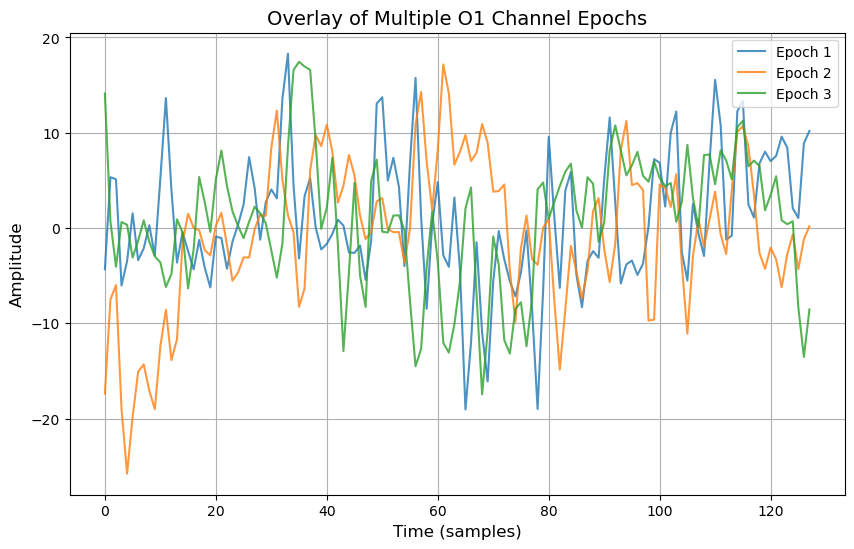

In [20]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each epoch for the O1 channel
for i in range(epochs_o1.shape[0]):
    plt.plot(epochs_o1[i], label=f'Epoch {i+1}', alpha=0.8)

# Add labels and title
plt.title('Overlay of Multiple O1 Channel Epochs', fontsize=14)
plt.xlabel('Time (samples)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
# Add legend to differentiate the epochs
plt.legend(loc='upper right')
# Add grid
plt.grid(True)

# Show plot
plt.show()

### Feature Extraction (Frequency Domain)
Now that you have the epochs for O1 and O2, the next task is to extract features from them. We will use Fast Fourier Transform (FFT) to analyze the dominant frequency components of each epoch.

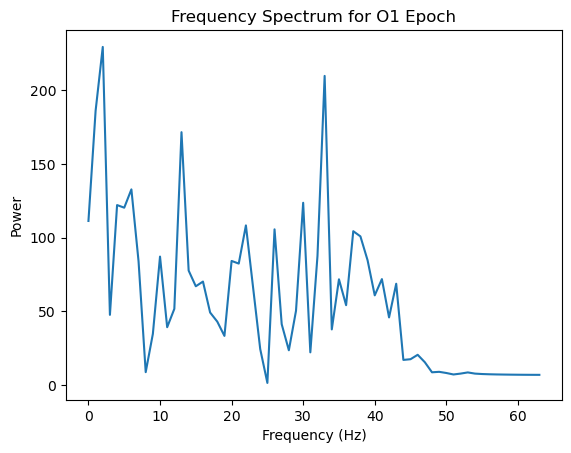

In [21]:
from numpy.fft import fft

# Function to calculate FFT for each epoch
def compute_fft(epoch, fs):
    N = len(epoch)
    T = 1.0 / fs
    fft_vals = fft(epoch)
    fft_freqs = np.fft.fftfreq(N, T)[:N//2]
    return fft_freqs, np.abs(fft_vals[:N//2])

# Apply FFT on the first epoch of O1 (for demonstration)
freqs, power = compute_fft(epochs_o1[0], fs)

# Plot the frequency domain
import matplotlib.pyplot as plt
plt.plot(freqs, power)
plt.title('Frequency Spectrum for O1 Epoch')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()


In [22]:
# Extract the dominant frequency for each epoch
def extract_dominant_freqs(epochs, fs):
    dominant_freqs = []
    for epoch in epochs:
        freqs, power = compute_fft(epoch, fs)
        dominant_freq = freqs[np.argmax(power)]
        dominant_freqs.append(dominant_freq)
    return np.array(dominant_freqs)

# Extract dominant frequencies for O1 and O2
dominant_freqs_o1 = extract_dominant_freqs(epochs_o1, fs)
dominant_freqs_o2 = extract_dominant_freqs(epochs_o2, fs)

# Output: Dominant frequencies for O1 and O2
print(f"Dominant Frequencies O1: {dominant_freqs_o1}")
print(f"Dominant Frequencies O2: {dominant_freqs_o2}")


Dominant Frequencies O1: [2. 1. 2.]
Dominant Frequencies O2: [13.  3.  8.]


### Classification (SVM)
Use the dominant frequencies as features to train an SVM classifier. In a real-world scenario, you would have corresponding labels (stimulus classes), which are used for training the model.

In [23]:
# Path to the test information file
test_info_path = r'../bayesian_approch_for_wave_signal_processing/data/test_info.csv'

# Load the test information CSV file
test_info = pd.read_csv(test_info_path)

# Display the loaded test information
print(test_info.head())


   TRANSFER RATE     TEST TYPE     TEST NAME  NUMBER OF EVENTS  \
0            128        VISUAL  IMAGE SEARCH                 5   
1            128        VISUAL    FIVE BOX 1                20   
2            128  MOTOR IMAGES    HAND SHAKE                 6   
3            128        VISUAL    FIVE BOX 1                20   
4            128        VISUAL    FIVE BOX 2                20   

   EVENT DURATION (ms)   SESSION DATA  STEADY-STATE TIME (s)  \
0                  250  A001SV1_1.EDF                      5   
1                  250  A001SB1_1.EDF                      5   
2                 5000  A001SM1_1.EDF                     25   
3                  250  A002SB1_1.EDF                      5   
4                  250  A002SB2_1.EDF                      5   

   TEST DURATION  (s)  
0                  96  
1                  71  
2                  46  
3                  67  
4                  70  


In [24]:
# Remove the '.EDF' extension from the 'SESSION DATA' column in test_info
test_info['SESSION DATA'] = test_info['SESSION DATA'].str.replace('.EDF', '')

# Merge the test information with the EEG data on the 'Source' column
eeg_data_with_info = eeg_data.merge(test_info, left_on='Source', right_on='SESSION DATA', how='left')

# Display the merged data to verify
print(eeg_data_with_info.head())


/tmp/ipykernel_228763/2080681320.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_info['SESSION DATA'] = test_info['SESSION DATA'].str.replace('.EDF', '')


   COUNTER  INTERPOLATED          AF3           F7           F3          FC5  \
0     17.0           0.0  4183.589641  4191.794769  4178.461436  4168.205026   
1     18.0           0.0  4183.589641  4200.512718  4179.999898  4193.333231   
2     19.0           0.0  4198.461436  4207.692205  4188.717846  4206.153743   
3     20.0           0.0  4198.974256  4191.794769  4184.615282  4184.102462   
4     21.0           0.0  4187.179385  4184.102462  4176.922975  4169.230667   

            T7           P7           O1           O2  ...  O1_filtered  \
0  4257.948614  4202.051179  4231.794768  4202.051179  ...    -0.694510   
1  4241.538358  4182.564000  4225.128102  4199.487077  ...    -7.319728   
2  4229.743486  4196.410154  4229.743486  4210.256307  ...    -2.673943   
3  4231.281948  4203.589641  4232.820409  4209.230666  ...     0.409269   
4  4204.102461  4196.922974  4230.769127  4204.615282  ...    -1.584606   

   O2_filtered  TRANSFER RATE  TEST TYPE   TEST NAME  NUMBER OF EVEN

In [25]:
eeg_data_with_info.columns.tolist()

['COUNTER',
 'INTERPOLATED',
 'AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4',
 'Source',
 'Group',
 'Subject',
 'Test',
 'Experiment',
 'Cluster',
 'O1_filtered',
 'O2_filtered',
 'TRANSFER RATE',
 'TEST TYPE',
 'TEST NAME',
 'NUMBER OF EVENTS',
 'EVENT DURATION (ms)',
 'SESSION DATA',
 'STEADY-STATE TIME (s)',
 'TEST DURATION  (s)']

In [26]:
import numpy as np

# Function to calculate event timings based on number of events and event duration
def calculate_event_times(test_duration, num_events, event_duration, fs=128):
    # Convert num_events to an integer
    num_events = int(num_events)
    
    # Calculate the time interval between events (in seconds)
    time_per_event = test_duration / num_events
    
    # Use np.linspace to generate the event times evenly spaced within the test duration
    event_times = np.linspace(0, test_duration, num=num_events, endpoint=False)
    
    return event_times

# Example: Calculate event times for a specific row in the test_info (assuming fs = 128 Hz)
test_duration = eeg_data_with_info['TEST DURATION  (s)'].iloc[0]
num_events = eeg_data_with_info['NUMBER OF EVENTS'].iloc[0]
event_duration = eeg_data_with_info['EVENT DURATION (ms)'].iloc[0] / 1000  # Convert to seconds

event_times = calculate_event_times(test_duration, num_events, event_duration)

# Display the calculated event times
print(f"Event times: {event_times}")


Event times: [ 0.    3.55  7.1  10.65 14.2  17.75 21.3  24.85 28.4  31.95 35.5  39.05
 42.6  46.15 49.7  53.25 56.8  60.35 63.9  67.45]


In [27]:
eeg_data_with_info.columns.tolist()

['COUNTER',
 'INTERPOLATED',
 'AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4',
 'Source',
 'Group',
 'Subject',
 'Test',
 'Experiment',
 'Cluster',
 'O1_filtered',
 'O2_filtered',
 'TRANSFER RATE',
 'TEST TYPE',
 'TEST NAME',
 'NUMBER OF EVENTS',
 'EVENT DURATION (ms)',
 'SESSION DATA',
 'STEADY-STATE TIME (s)',
 'TEST DURATION  (s)']

In [28]:
# Assuming 'O1_filtered' is the filtered O1 channel data and 'Stimulus' will store the label
eeg_data_with_info['Stimulus'] = eeg_data_with_info['TEST NAME']
eeg_data_with_info.head()

,COUNTER,INTERPOLATED,AF3,F7,F3,FC5,T7,P7,O1,O2,...,O2_filtered,TRANSFER RATE,TEST TYPE,TEST NAME,NUMBER OF EVENTS,EVENT DURATION (ms),SESSION DATA,STEADY-STATE TIME (s),TEST DURATION (s),Stimulus
0,17.0,0.0,4183.589641,4191.794769,4178.461436,4168.205026,4257.948614,4202.051179,4231.794768,4202.051179,...,0.225936,128.0,VISUAL,FIVE BOX 1,20.0,250.0,A001SB1_1,5.0,71.0,FIVE BOX 1
1,18.0,0.0,4183.589641,4200.512718,4179.999898,4193.333231,4241.538358,4182.564000,4225.128102,4199.487077,...,-2.520917,128.0,VISUAL,FIVE BOX 1,20.0,250.0,A001SB1_1,5.0,71.0,FIVE BOX 1
2,19.0,0.0,4198.461436,4207.692205,4188.717846,4206.153743,4229.743486,4196.410154,4229.743486,4210.256307,...,7.156347,128.0,VISUAL,FIVE BOX 1,20.0,250.0,A001SB1_1,5.0,71.0,FIVE BOX 1
3,20.0,0.0,4198.974256,4191.794769,4184.615282,4184.102462,4231.281948,4203.589641,4232.820409,4209.230666,...,6.531822,128.0,VISUAL,FIVE BOX 1,20.0,250.0,A001SB1_1,5.0,71.0,FIVE BOX 1
4,21.0,0.0,4187.179385,4184.102462,4176.922975,4169.230667,4204.102461,4196.922974,4230.769127,4204.615282,...,0.685577,128.0,VISUAL,FIVE BOX 1,20.0,250.0,A001SB1_1,5.0,71.0,FIVE BOX 1


In [29]:
eeg_data_with_info.shape,eeg_data.shape

((1272484, 33), (1272484, 24))

In [30]:
# Update function to handle the full DataFrame
def label_epochs(data, event_times, channel_name, epoch_duration=1, fs=128):
    epochs = []
    labels = []
    for event_time in event_times:
        start_idx = int(event_time * fs)
        end_idx = start_idx + int(epoch_duration * fs)
        
        # Extract the EEG data for the specific channel (e.g., O1)
        epoch = data[channel_name].iloc[start_idx:end_idx]
        epochs.append(epoch)
        
        # Extract the label from the 'Stimulus' column
        label = data['Stimulus'].iloc[0]  # Assuming one label per session
        labels.append(label)
        
    return np.array(epochs), labels

# Example: Label epochs for O1 channel
epochs_o1, labels_o1 = label_epochs(eeg_data_with_info, event_times, channel_name='O1_filtered')

# Display the first epoch and its corresponding label
print(f"First Epoch: {epochs_o1[0]}")
print(f"Label: {labels_o1[0]}")

First Epoch: [-6.94509588e-01 -7.31972779e+00 -2.67394336e+00  4.09268686e-01
 -1.58460588e+00  9.50294460e-01  3.06132485e+00  1.41344933e+00
  2.67332191e+00  2.76770621e+00 -1.32388259e+00 -2.42663232e+00
 -4.62871486e-01 -1.75686979e+00 -5.40820193e+00 -4.22162921e+00
 -1.44550309e+00 -3.94579112e+00 -4.41311076e+00 -2.76264392e+00
 -5.97668640e+00 -8.03812944e+00 -1.08273596e+01 -1.58386948e+01
 -8.99377682e+00  1.97484442e+00 -6.08307676e-01 -8.78704186e+00
 -1.48833293e+01 -1.65885801e+01 -7.87730525e+00 -9.10771183e-02
 -3.76212832e+00 -6.70455500e+00 -3.88051859e+00 -5.43058867e+00
 -6.78720597e+00  3.18787514e+00  1.02415410e+01  9.63097305e-01
 -7.45069510e+00 -5.50309063e+00 -3.02362422e+00  3.92036922e+00
  1.42189687e+01  8.25444162e+00 -7.09852765e+00 -8.76463195e+00
 -3.44473754e+00 -6.12562621e-01  3.43505820e+00  2.19484672e+00
 -7.70042846e-01  7.50832862e+00  1.70925421e+01  1.58891878e+01
  7.88258788e+00  2.14158775e+00  8.41337150e+00  1.58054862e+01
  9.64037129

In [35]:
epochs_o1.shape,len(labels_o1)

((20, 128), 20)

In [37]:
# Update function to handle the non-epoch intervals with varying lengths
def extract_non_epoch_intervals(data, event_times, epoch_duration=1, fs=128):
    non_epoch_intervals = []
    labels = []
    
    # Track where the previous epoch ends
    last_end_idx = 0
    
    for event_time in event_times:
        start_idx = int(event_time * fs)
        end_idx = start_idx + int(epoch_duration * fs)
        
        # Extract the non-epoch interval between the last epoch and the current one
        if start_idx > last_end_idx:
            non_epoch_interval = data.iloc[last_end_idx:start_idx]
            non_epoch_intervals.append(non_epoch_interval)
            labels.append("NON EPOCH INTERVAL")
        
        # Update the last end index to the end of the current epoch
        last_end_idx = end_idx
    
    # If there's remaining data after the last epoch, capture it as a non-epoch interval
    if last_end_idx < len(data):
        non_epoch_intervals.append(data.iloc[last_end_idx:])
        labels.append("NON EPOCH INTERVAL")
    
    # Return as a list of non-epoch intervals and labels
    return non_epoch_intervals, labels

# Example: Extract non-epoch intervals for the O1 channel
non_epoch_intervals_o1, non_epoch_labels_o1 = extract_non_epoch_intervals(eeg_data_with_info['O1_filtered'], event_times)

# Display the first non-epoch interval and its corresponding label
print(f"First Non-Epoch Interval: {non_epoch_intervals_o1[0]}")
print(f"Label: {non_epoch_labels_o1[0]}")


First Non-Epoch Interval: 128   -4.990158
129    4.437663
130    2.563730
131    1.325088
132    1.601735
         ...   
449    0.761945
450    9.330351
451    3.633470
452    1.585684
453    6.759433
Name: O1_filtered, Length: 326, dtype: float64
Label: NON EPOCH INTERVAL


In [41]:
# Combine epoch data and non-epoch intervals into lists
all_intervals_o1 = list(epochs_o1) + non_epoch_intervals_o1
all_labels_o1 = labels_o1 + non_epoch_labels_o1

# Check the combined data
print(f"Combined Data Length: {len(all_intervals_o1)}")
print(f"Combined Labels: {all_labels_o1[:5]}")


Combined Data Length: 40
Combined Labels: ['FIVE BOX 1', 'FIVE BOX 1', 'FIVE BOX 1', 'FIVE BOX 1', 'FIVE BOX 1']


In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare data for classification: using the mean of each interval (simplified example)
X = np.array([np.mean(interval) for interval in all_intervals_o1 if len(interval) > 0])  # Feature: mean of each interval
y = np.array(all_labels_o1)  # Labels: epoch or non-epoch

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.3, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

        FIVE BOX 1       0.00      0.00      0.00         7
NON EPOCH INTERVAL       0.42      1.00      0.59         5

          accuracy                           0.42        12
         macro avg       0.21      0.50      0.29        12
      weighted avg       0.17      0.42      0.25        12



/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
np.unique(y_train, return_counts=True)

(array(['FIVE BOX 1', 'NON EPOCH INTERVAL'], dtype='<U18'), array([13, 15]))

In [50]:
y_train.shape,y_test.shape

((28,), (12,))

In [51]:
from scipy.stats import skew, kurtosis

# Function to extract statistical features for each interval
def extract_statistical_features(intervals):
    features = []
    for interval in intervals:
        if len(interval) > 0:
            mean_val = np.mean(interval)
            std_val = np.std(interval)
            skewness_val = skew(interval)
            kurtosis_val = kurtosis(interval)
            features.append([mean_val, std_val, skewness_val, kurtosis_val])
    return np.array(features)

# Extract statistical features from both epoch and non-epoch intervals
X = extract_statistical_features(all_intervals_o1)

# Example: Check the first row of features
print(X[0])


[-1.02195828  7.30344945  0.28630289 -0.1297601 ]


In [52]:
from sklearn.utils import resample

# Function to perform bootstrapping
def bootstrap_data(X, y, n_samples):
    X_bootstrap, y_bootstrap = resample(X, y, n_samples=n_samples, replace=True, random_state=42)
    return X_bootstrap, y_bootstrap

# Generate synthetic data by bootstrapping
n_samples = len(X) * 2  # Increase the sample size by 2x
X_bootstrap, y_bootstrap = bootstrap_data(X, all_labels_o1, n_samples)

# Example: Check the shape of the bootstrapped data
print(f"Original data size: {X.shape}")
print(f"Bootstrapped data size: {X_bootstrap.shape}")


Original data size: (40, 4)
Bootstrapped data size: (80, 4)


In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the bootstrapped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.3, random_state=42)

# Train an SVM classifier with the bootstrapped and enhanced data
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

        FIVE BOX 1       0.46      0.67      0.55         9
NON EPOCH INTERVAL       0.73      0.53      0.62        15

          accuracy                           0.58        24
         macro avg       0.59      0.60      0.58        24
      weighted avg       0.63      0.58      0.59        24



In [54]:
# Function to extract both statistical and FFT features
def extract_combined_features(intervals, fs=128):
    features = []
    for interval in intervals:
        if len(interval) > 0:
            mean_val = np.mean(interval)
            std_val = np.std(interval)
            skewness_val = skew(interval)
            kurtosis_val = kurtosis(interval)
            freqs, fft_power = compute_fft(interval, fs)
            max_fft = np.max(fft_power)
            features.append([mean_val, std_val, skewness_val, kurtosis_val, max_fft])
    return np.array(features)

# Extract combined features
X_combined = extract_combined_features(all_intervals_o1)



In [55]:
# Function to perform bootstrapping
def bootstrap_data(X, y, n_samples):
    X_bootstrap, y_bootstrap = resample(X, y, n_samples=n_samples, replace=True, random_state=42)
    return X_bootstrap, y_bootstrap

# Generate synthetic data by bootstrapping
n_samples = len(X_combined) * 2  # Increase the sample size by 2x
X_bootstrap, y_bootstrap = bootstrap_data(X_combined, all_labels_o1, n_samples)

# Example: Check the shape of the bootstrapped data
print(f"Original data size: {X_combined.shape}")
print(f"Bootstrapped data size: {X_bootstrap.shape}")

Original data size: (40, 5)
Bootstrapped data size: (80, 5)


In [56]:
# Split the bootstrapped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.3, random_state=42)

# Train an SVM classifier with the bootstrapped and enhanced data
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

        FIVE BOX 1       1.00      0.89      0.94         9
NON EPOCH INTERVAL       0.94      1.00      0.97        15

          accuracy                           0.96        24
         macro avg       0.97      0.94      0.95        24
      weighted avg       0.96      0.96      0.96        24



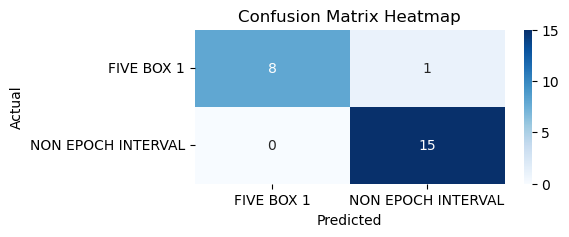

In [60]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['FIVE BOX 1', 'NON EPOCH INTERVAL'], yticklabels=['FIVE BOX 1', 'NON EPOCH INTERVAL'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()